In [591]:
import pandas as pd

In [592]:
base_url = 'https://www.basketball-reference.com/leagues/NBA_{0}_ratings.html'

In [593]:
advanced = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2019_advanced.html')[0]

In [594]:
advanced.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'Unnamed: 24', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [595]:

def get_advanced_totals():
    per_year = []
    for year in range(2005, 2020):
        print("Getting data for {0}".format(year))
        advanced = pd.read_html('https://www.basketball-reference.com/leagues/NBA_{0}_advanced.html'.format(year))[0]
        advanced['Year'] = year
    
        to_keep = [c for c in advanced.columns if 'Unnamed' not in c]
        advanced = advanced[to_keep]

        to_keep = [c for c in advanced.columns if c != 'Rk']
        advanced = advanced[advanced['Age'] != 'Age']

        int_columns = {'Age', 'G', 'MP', 'Year'}
        str_columns = {'Pos', 'Tm', 'Player'}

        for c in advanced.columns:
            if c in str_columns:
                continue

            if c in int_columns:
                advanced[c] = advanced[c].astype('int')
            else:
                advanced[c] = advanced[c].astype('float')

        per_year.append(advanced)
    
    return pd.concat(per_year, axis=0)


In [596]:
totals = get_advanced_totals()


Getting data for 2005
Getting data for 2006
Getting data for 2007
Getting data for 2008
Getting data for 2009
Getting data for 2010
Getting data for 2011
Getting data for 2012
Getting data for 2013
Getting data for 2014
Getting data for 2015
Getting data for 2016
Getting data for 2017
Getting data for 2018
Getting data for 2019


In [598]:
def filter_stats(advanced):
    filtered = advanced.copy()
    filtered['MP/G'] = filtered['MP'] / filtered['G']
    filtered = filtered[(filtered['MP/G'] > filtered['MP/G'].describe()['25%']) & (filtered['G'] > 30)]

    filtered['Pos'] = filtered['Pos'].apply(lambda x: x.split('-')[0])
    return filtered

def plot(advanced, stat='WS/48'):  
    ax = sns.stripplot(x="Pos", y=stat, data=filter_stats(advanced).sort_values('Pos', ascending=False), jitter=True)

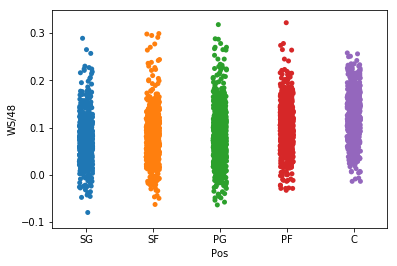

In [622]:
plot(totals[totals['Year'] > 2009], stat='WS/48')

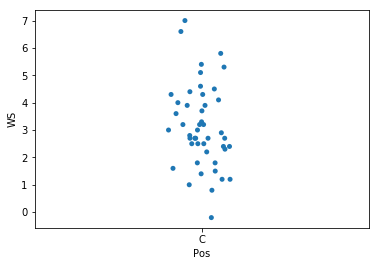

In [620]:
centers = filter_stats(totals[(totals['Pos'] == 'C') & (totals['Year'] == 2019)]).sort_values('WS', ascending=False).head(n=50)
sns.stripplot(x="Pos", y="WS", data=centers)

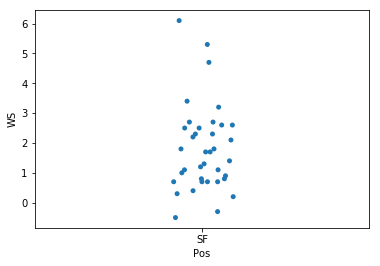

In [621]:
sf = filter_stats(totals[(totals['Pos'] == 'SF') & (totals['Year'] == 2019)]).sort_values('WS', ascending=False).head(n=50)
sns.stripplot(x="Pos", y="WS", data=sf)

In [557]:
f.sort_values('WS/48')[['Player', 'WS/48', 'Year', 'G']]

,Player,WS/48,Year,G
240,Justin Holiday,-0.189,2019,1
539,Xavier Rathan-Mayes,-0.171,2018,5
493,Chinanu Onuaku,-0.147,2018,1
206,Jerami Grant,-0.144,2017,2
262,Josh Jackson,-0.080,2019,40
39,Jerryd Bayless,-0.067,2017,3
140,Duje Dukan,-0.057,2016,1
404,Emmanuel Mudiay,-0.049,2016,68
449,Collin Sexton,-0.049,2019,40
261,Nigel Hayes,-0.048,2018,5


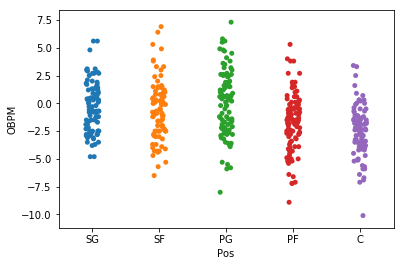

In [396]:
adv_2010 = get_advanced_totals(2005)
plot(adv_2010)

In [196]:
def get_defensive_ratings(year):
    url = base_url.format(year)
    table = pd.read_html(url, skiprows=0, header=1)[0]
    table = table.sort_values(by='DRtg')
    table['Defensive Rank'] = table['DRtg'].rank(ascending=True).astype('int')
    
    table['Abbr'] = table['Team'].apply(to_abbr)
    table = table[['Defensive Rank', 'Abbr']]
    table.columns = ['Def Rank', 'Opp']
    
    return table

In [199]:
def_rank = get_defensive_ratings(2018)

In [89]:
ABBR_OVERRIDES = {
    'Oklahoma City Thunder': 'OKC',
    'Portland Trail Blazers': 'POR',
    'Brooklyn Nets': 'BRK',
    'Charlotte Hornets': 'CHO',
}

def to_abbr(team_name):
    if team_name in ABBR_OVERRIDES:
        return ABBR_OVERRIDES[team_name]
    
    parts = team_name.split(' ')
    if len(parts) > 2:
        first_letters = [x[0] for x in parts]
        return ''.join(first_letters)
    else:
        return parts[0][:3].upper()

In [204]:
def_rank.head(n=15)

,Def Rank,Opp
3,1,UTA
6,2,BOS
7,3,SAS
4,4,PHI
1,5,TOR
0,6,HOU
8,7,POR
15,8,MIA
5,9,OKC
18,10,DET


In [44]:
jokic_game_log = pd.read_html('')[-1]

In [48]:
first,last = 'Luke Doncic'.split(' ')
last[:5]

'Donci'

In [283]:
PLAYER_URL = 'https://www.basketball-reference.com/players/j/{0}/gamelog/2018'

PLAYER_OVERRIDES = {
    'Kemba Walker': 'walkeke02',
    'Anthony Davis': 'davisan02',
    'DeAngelo Russell': 'russeda01',
}


def get_game_log(player):
    if player in PLAYER_OVERRIDES:
        player_id = PLAYER_OVERRIDES[player]
    else:
        first, last = player.split(' ')
        player_id = '{0}{1}01'.format(last[:5].lower(), first[:2])

    table = pd.read_html(PLAYER_URL.format(player_id))[-1]
    
    # filter rows
    table = table[table['Opp'] != 'Opp']
    table = table[table.GS.isin(["0", "1"])]
    
    # merge with opponents
    merged = pd.merge(def_rank, table, how='inner', on='Opp')
    merged = merged[['Def Rank', 'Opp', 'G', 'Date', 'MP', 'FG', 'FGA', 'FG%', 'PTS']]
    
    merged[['FG', 'FGA', 'PTS']] = merged[['FG', 'FGA', 'PTS']].astype('int')
    merged['FG%'] = merged['FG%'].astype('float')
    return merged

In [288]:
pd.options.mode.chained_assignment = None

def splits(game_logs, num=10):
    
    # top defenses
    top = game_logs[game_logs['Def Rank'] <= num]
    print(top['PTS'].describe())
    top['Category'] = ['Top'] * len(top)
    
    print("")
    
    bottom = game_logs[game_logs['Def Rank'] >= 30 - num + 1]
    print(bottom['PTS'].describe())
    bottom['Category'] = ['Bottom'] * len(bottom)
    
    data = pd.concat([top[['PTS', 'Category']], bottom[['PTS', 'Category']]])
    ax = sns.stripplot(x="Category", y="PTS", data=data, jitter=True)
    return data


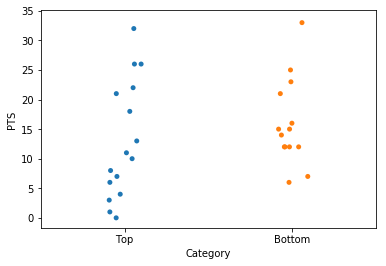

In [284]:
player_info('DeAngelo Russell')

In [200]:
def player_info(player, num=10):
    logs = get_game_log(player)
    splits(logs, num)

count    22.000000
mean     16.136364
std       7.120028
min       3.000000
25%      11.250000
50%      16.000000
75%      19.750000
max      36.000000
Name: PTS, dtype: float64

count    21.000000
mean     16.428571
std       8.470959
min       2.000000
25%      11.000000
50%      17.000000
75%      19.000000
max      38.000000
Name: PTS, dtype: float64


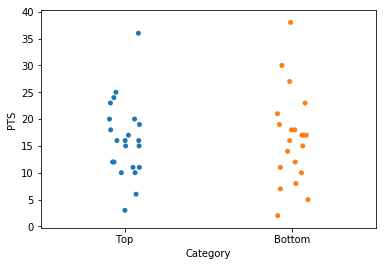

In [291]:
player_info('Austin Rivers')

In [246]:
tips = sns.load_dataset("tips")

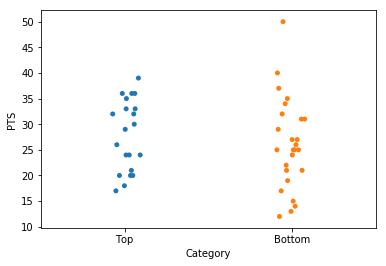

In [260]:
ax = sns.stripplot(x="Category", y="PTS", data=data, jitter=True)